In [1]:
import sys

In [2]:
sys.path

['C:\\Users\\User\\Anaconda3\\envs\\pytorch\\python36.zip',
 'C:\\Users\\User\\Anaconda3\\envs\\pytorch\\DLLs',
 'C:\\Users\\User\\Anaconda3\\envs\\pytorch\\lib',
 'C:\\Users\\User\\Anaconda3\\envs\\pytorch',
 '',
 'C:\\Users\\User\\Anaconda3\\envs\\pytorch\\lib\\site-packages',
 'C:\\Users\\User\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\User\\.ipython']

In [5]:
import torch

In [25]:
import torch.nn as nn

In [6]:
from torchvision import datasets, transforms

In [37]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [40]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [42]:
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [43]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10))

criterion = nn.CrossEntropyLoss()

images, labels = next(iter(trainloader))

images = images.view(images.shape[0],-1)

logits = model(images)

loss = criterion(logits, labels)

print(loss)

tensor(2.2925, grad_fn=<NllLossBackward>)


In [56]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

logps = model(images)

loss = criterion(logps, labels)
print("Loss: {}".format(loss))

Loss: 2.323791742324829


## Autograd

In [59]:
x = torch.rand(2,2,requires_grad=True)

In [60]:
x

tensor([[0.6872, 0.4508],
        [0.1086, 0.6609]], requires_grad=True)

In [61]:
y = x**2

In [62]:
print(y)

tensor([[0.4723, 0.2032],
        [0.0118, 0.4367]], grad_fn=<PowBackward0>)


In [63]:
print(y.grad_fn)

In [64]:
z = y.mean()
print(z)

tensor(0.2810, grad_fn=<MeanBackward1>)


In [65]:
print(x.grad)

None


In [66]:
z.backward()

In [74]:
print(x.grad)

tensor([[0.3436, 0.2254],
        [0.0543, 0.3304]])


### Neural Network with Backpropagation 

In [77]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))

images = images.view(images.shape[0],-1)

logprobs = model(images)

loss = criterion(logprobs,labels)

In [78]:
print(loss)

tensor(2.3081, grad_fn=<NllLossBackward>)


In [80]:
print("Before backprop {}".format(model[0].weight.grad))
loss.backward()
print("After backprop {}".format(model[0].weight.grad))

Before backprop None
After backprop tensor([[-0.0029, -0.0029, -0.0029,  ..., -0.0029, -0.0029, -0.0029],
        [-0.0040, -0.0040, -0.0040,  ..., -0.0040, -0.0040, -0.0040],
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        ...,
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005]])


In [83]:
print("After backprop {}".format(model[2].weight.grad))

After backprop tensor([[ 4.1413e-04, -2.9859e-03,  1.0058e-04,  ..., -1.9176e-03,
         -5.5404e-04, -1.7326e-03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-4.9239e-04, -8.0323e-04, -4.3292e-04,  ..., -7.3557e-04,
         -1.0454e-04, -9.6155e-05],
        ...,
        [ 5.3708e-03,  4.2295e-03,  3.4071e-03,  ...,  3.9200e-03,
          6.4069e-04,  2.1216e-03],
        [ 8.6112e-03,  5.7455e-03,  3.9462e-03,  ...,  3.4358e-03,
          7.4778e-04,  9.9920e-03],
        [ 7.6290e-03,  1.8294e-03, -7.6870e-04,  ...,  1.3134e-03,
         -3.3456e-04,  9.9401e-03]])


In [84]:
from torch import optim

In [89]:
optimizer = optim.SGD(model.parameters(),lr=0.1)

In [90]:
print("Initial weights {}".format(model[0].weight))

images, labels = next(iter(trainloader))

images = images.view(images.shape[0],-1)

optimizer.zero_grad()

output = model.forward(images)
loss = criterion(output,labels)
loss.backward()
print("Gradients {}".format(model[0].weight.grad))

Initial weights Parameter containing:
tensor([[-0.0165,  0.0103,  0.0299,  ..., -0.0077,  0.0246, -0.0242],
        [-0.0172, -0.0024,  0.0082,  ...,  0.0002,  0.0076,  0.0048],
        [-0.0204,  0.0171,  0.0333,  ...,  0.0253,  0.0275,  0.0226],
        ...,
        [ 0.0073,  0.0248, -0.0286,  ...,  0.0319, -0.0026,  0.0312],
        [-0.0151,  0.0035, -0.0264,  ...,  0.0253,  0.0225, -0.0229],
        [-0.0249, -0.0111, -0.0319,  ..., -0.0301,  0.0005, -0.0001]],
       requires_grad=True)
Gradients tensor([[-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [ 0.0051,  0.0051,  0.0051,  ...,  0.0051,  0.0051,  0.0051],
        [ 0.0029,  0.0029,  0.0029,  ...,  0.0029,  0.0029,  0.0029],
        ...,
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003]])


In [91]:
optimizer.step()
print("After one step: {}".format(model[0].weight))

After one step: Parameter containing:
tensor([[-0.0164,  0.0104,  0.0300,  ..., -0.0076,  0.0247, -0.0241],
        [-0.0177, -0.0030,  0.0077,  ..., -0.0003,  0.0070,  0.0043],
        [-0.0207,  0.0168,  0.0330,  ...,  0.0251,  0.0272,  0.0223],
        ...,
        [ 0.0072,  0.0247, -0.0286,  ...,  0.0318, -0.0027,  0.0311],
        [-0.0150,  0.0037, -0.0262,  ...,  0.0254,  0.0227, -0.0228],
        [-0.0249, -0.0112, -0.0319,  ..., -0.0302,  0.0005, -0.0002]],
       requires_grad=True)


In [94]:
import numpy as np

### Full Neural Network

In [149]:
model = nn.Sequential(nn.Linear(784,256),
                    nn.ReLU(),
                    nn.Linear(256,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

In [151]:
error = []
for i in range(1,1000+1):
    #prepare data
    images, labels = next(iter(trainloader))
    images = images.view(images.shape[0],-1)
    #initialize gradient to zero
    optimizer.zero_grad()    
    #forward propagation
    output = model(images)
    #calculate error
    loss = criterion(output, labels)
    #backpropagation
    loss.backward()
    #update rule
    optimizer.step()
     
    if i%100==0:
        error.append(loss.item())
        print("At time step {} Loss: {}".format(i,loss.item()))
        print("===============================================")

At time step 100 Loss: 0.11813484132289886
At time step 200 Loss: 0.19559788703918457
At time step 300 Loss: 0.11553216725587845
At time step 400 Loss: 0.31023550033569336
At time step 500 Loss: 0.0899040624499321
At time step 600 Loss: 0.08915595710277557
At time step 700 Loss: 0.18568871915340424
At time step 800 Loss: 0.1915172040462494
At time step 900 Loss: 0.20672257244586945
At time step 1000 Loss: 0.025915861129760742


In [153]:
!pip install matplotlib

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [156]:
error = np.array(error)

In [159]:
i_episodes = np.linspace(0,1000+1,len(error))

Text(0.5, 1.0, 'Loss vs Number of Episodes')

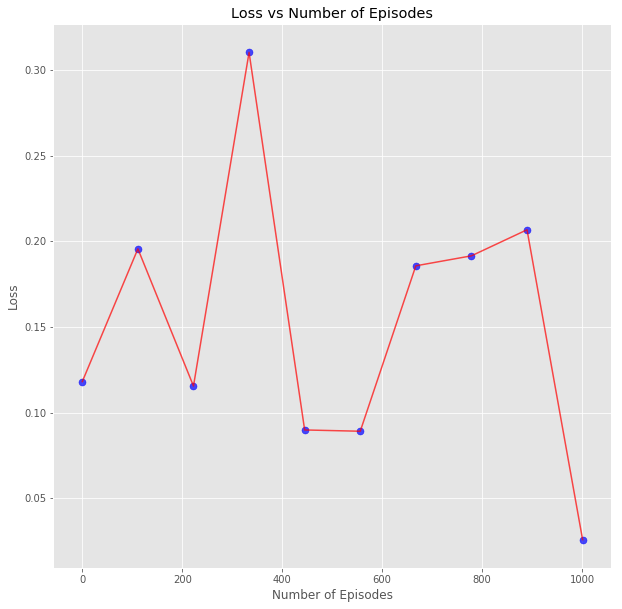

In [173]:
plt.figure(figsize=(10,10))
plt.plot(i_episodes,error,c='r',alpha=0.7)
plt.grid(True)
plt.scatter(i_episodes,error,s=50,c='b',alpha=0.7)
plt.xlabel("Number of Episodes")
plt.ylabel("Loss")
plt.title("Loss vs Number of Episodes")


In [174]:
images,labels = next(iter(trainloader))

In [186]:
img = images.view(images.shape[0],-1)

In [188]:
output = model(img)

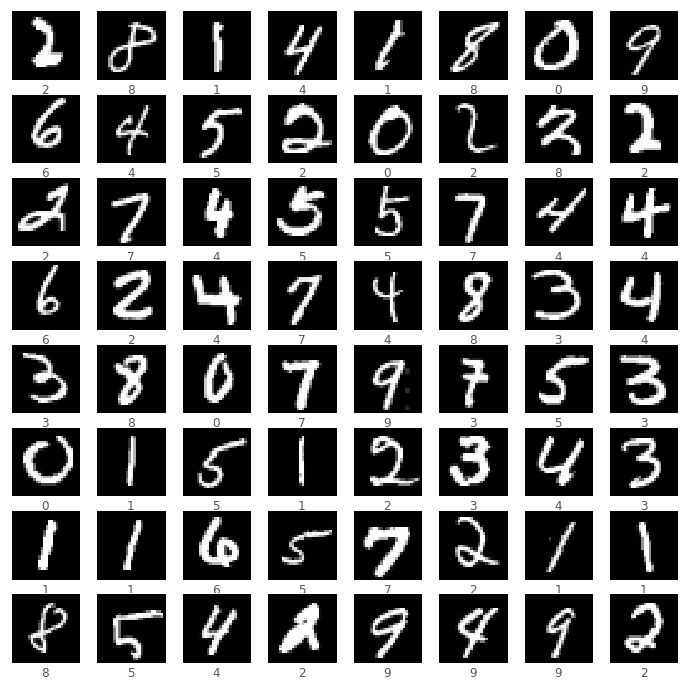

In [198]:
plt.figure(figsize=(12,12))
for i in range(output.shape[0]):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i].reshape(28,28),cmap='gray',interpolation='nearest')
    plt.xlabel((torch.argmax(output[i])).numpy())
plt.show()